In [1]:
import euclidemu2 as ee2
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.interpolate

In [2]:
# Set plotting and printing options (may result in errors if latex is not installed)
%matplotlib inline

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='x-large'
plt.rc('font', **font)
plt.rcParams['text.usetex'] = True

np.set_printoptions(precision=3,linewidth=200,suppress=False)

In [3]:
# Input parameter dictionary 
#
# Accepts multiple formats such as CLASS par dictionary
# Accepts both Omega_x or omega_x = Omega_x*h^2 depending on capitalization of O
# Requires at least 5 parameters (As, ns, Omb, Omm, h)
# Other parameters (mnu,w,wa) will be set to LCDM values if not specified
# Additional parameters will be ignored.

cosmo_par={'As':2.1e-09,
           'ns':0.966,
           'Omb':0.04,
           'Omm':0.3,
           'h':0.68,
           'mnu':0.15,
           'w':-1.0,
           'wa':0.0}

#Array with chosen redshifts (between 0 and 10)
redshifts=[0,2,4,6,8,10]

# Standard call of the main function with default k-range
#
# Always returns a numpy array for k and a dict for b indexed with an
# integer corresponding to the position in the redshifts array.
# Each element of the dictionary in b is a numpy array with the boost

k, b = ee2.get_boost(cosmo_par,redshifts)

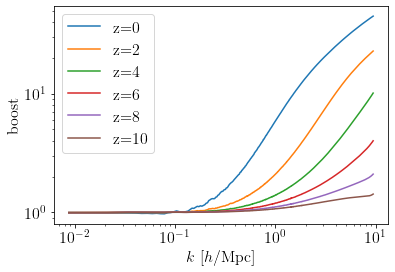

In [4]:
for i in range(len(redshifts)):
    plt.loglog(k,b[i],label="z="+str(redshifts[i]))

plt.xlabel(r'$k\ [h/\rm{Mpc}]$'); plt.ylabel('boost')
plt.legend()

In [5]:
#Call with custom k-range with extrapolation (Warnings are to be expected when outside the default range)

k_custom=np.geomspace(1e-4,100,1000)

k2, b2 = ee2.get_boost(cosmo_par,redshifts,k_custom)

/opt/anaconda3/envs/likelihood/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes beyond k_max = 9.41h/Mpc. 
Higher k modes constantly extrapolated.
  """
/opt/anaconda3/envs/likelihood/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes below k_min = 8.73e-3 h/Mpc. 
Lower k modes constantly extrapolated.
  """


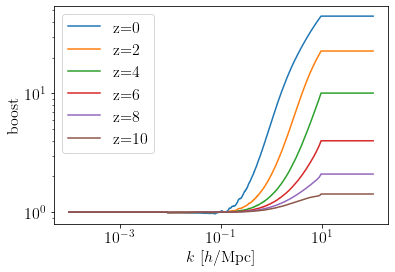

In [6]:
for i in range(len(redshifts)):
    plt.loglog(k2,b2[i],label="z="+str(redshifts[i]))

plt.xlabel(r'$k\ [h/\rm{Mpc}]$'); plt.ylabel('boost')
plt.legend()